# Análise Exploratória

A análise abaixo foi realizada utilizando os dados coletados do site statusinvest.com.br e, através de webscraping e utilização da biblioteca BeautifulSoup foram tratados e posteriormente convertidos em arquivo csv. Caso queira verificar o método desta primeira etapa acessar o notebook "WebScraping" 

## Importando bibliotecas e arquivos

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('dados_empresas_statsusinvest.csv', sep = ';')

In [6]:
df.head()

,Papel,Empresa,CNPJ,Setor de atuação,Subsetor de atuação,Segmento de atuação,Patrimônio líquido,Ativos,Ativo circulante,Dívida bruta,...,Valor de mercado,Valor de firma,Número total de papéis,Segmento de listagem,Free float,Cotação atual,Mínima 52 semanas,Máxima 52 semanas,Dividend Yield,Valorização
0,aalr3,CENTRO DE IMAGEM DIAGNOSTICOS S.A.,42.771.949/0001-35,Saúde,Serv.Méd.Hospit..Análises e Diagnósticos,Serv.Méd.Hospit..Análises e Diagnósticos,1145368000,2573833000,457827000,808798000,...,2518454053,3087062053,118292816,Novo Mercado,35.52,21.29,12.85,21.60,-,65.68
1,abcb4,BCO ABC BRASIL S.A.,28.195.667/0001-06,Financeiro e Outros,Intermediários Financeiros,Bancos,5070725000,52140478000,4297215000,-,...,4291190440,4291190440,226090118,Nível 2,29.88,18.98,14.47,22.29,7.36,30.00
2,abev3,AMBEV S.A.,07.526.557/0001-00,Consumo não Cíclico,Bebidas,Cervejas e Refrigerantes,90178032000,142063954000,41556965000,2980480000,...,225543105306,209463715306,15750216851,NaN,27.85,14.32,12.47,16.03,5.32,2.95
3,aeri3,AERIS IND. E COM. DE EQUIP. GERACAO DE ENERGIA...,12.528.708/0001-07,Bens Industriais,Máquinas e Equipamentos,Máq. e Equip. Industriais,942087000,3459015000,2285013000,1573577000,...,819848398,1537033398,766213456,Novo Mercado,29.64,1.07,0.88,6.54,1.93,-81.83
4,aesb3,AES BRASIL ENERGIA S.A.,37.663.076/0001-07,Utilidade Pública,Energia Elétrica,Energia Elétrica,4175175000,15104672000,4091868000,7893505000,...,5573846900,10011969900,601927311,Novo Mercado,52.37,9.26,9.05,12.06,1.16,-7.12


In [4]:
df.shape

(459, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Papel                   459 non-null    object 
 1   Empresa                 459 non-null    object 
 2   CNPJ                    459 non-null    object 
 3   Setor de atuação        459 non-null    object 
 4   Subsetor de atuação     459 non-null    object 
 5   Segmento de atuação     459 non-null    object 
 6   Patrimônio líquido      459 non-null    int64  
 7   Ativos                  459 non-null    int64  
 8   Ativo circulante        459 non-null    int64  
 9   Dívida bruta            459 non-null    object 
 10  Disponibilidade         459 non-null    int64  
 11  Dívida líquida          459 non-null    object 
 12  Valor de mercado        459 non-null    object 
 13  Valor de firma          459 non-null    object 
 14  Número total de papéis  459 non-null    in

In [8]:
df.isnull().sum()

Papel                       0
Empresa                     0
CNPJ                        0
Setor de atuação            0
Subsetor de atuação         0
Segmento de atuação         0
Patrimônio líquido          0
Ativos                      0
Ativo circulante            0
Dívida bruta                0
Disponibilidade             0
Dívida líquida              0
Valor de mercado            0
Valor de firma              0
Número total de papéis      0
Segmento de listagem      197
Free float                  0
Cotação atual               0
Mínima 52 semanas           0
Máxima 52 semanas           0
Dividend Yield              0
Valorização                 0
dtype: int64

In [10]:


numericos = ['Patrimônio líquido','Ativos','Ativo circulante','Dívida bruta','Disponibilidade','Dívida líquida',
           'Valor de mercado','Valor de firma','Número total de papéis','Free float','Cotação atual','Mínima 52 semanas',
           'Máxima 52 semanas','Dividend Yield','Valorização']

for numerico in numericos:
    df[numerico] = pd.to_numeric(df[numerico], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Papel                   459 non-null    object 
 1   Empresa                 459 non-null    object 
 2   CNPJ                    459 non-null    object 
 3   Setor de atuação        459 non-null    object 
 4   Subsetor de atuação     459 non-null    object 
 5   Segmento de atuação     459 non-null    object 
 6   Patrimônio líquido      459 non-null    int64  
 7   Ativos                  459 non-null    int64  
 8   Ativo circulante        459 non-null    int64  
 9   Dívida bruta            410 non-null    float64
 10  Disponibilidade         459 non-null    int64  
 11  Dívida líquida          410 non-null    float64
 12  Valor de mercado        456 non-null    float64
 13  Valor de firma          456 non-null    float64
 14  Número total de papéis  459 non-null    in

In [12]:
df['Segmento de listagem'] = df['Segmento de listagem'].fillna('-')

In [13]:
df['Dividend Yield'] = df['Dividend Yield'].fillna(0)

In [14]:
df = df.dropna(axis = 0, subset=['Free float', 'Valorização', 'Valor de mercado'])

In [16]:
df.describe()

,Patrimônio líquido,Ativos,Ativo circulante,Dívida bruta,Disponibilidade,Dívida líquida,Valor de mercado,Valor de firma,Número total de papéis,Free float,Cotação atual,Mínima 52 semanas,Máxima 52 semanas,Dividend Yield,Valorização
count,4.200000e+02,4.200000e+02,4.200000e+02,3.730000e+02,4.200000e+02,3.730000e+02,4.200000e+02,4.200000e+02,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,8.593537e+09,5.210452e+10,8.966384e+09,5.511115e+09,3.348293e+09,3.382174e+09,1.245025e+10,1.545395e+10,9.339046e+08,51.554333,19.987119,16.175643,26.460810,4.961857,13.963500
std,2.404898e+10,2.370151e+11,3.177321e+10,1.125503e+10,1.207581e+10,8.358648e+09,3.542030e+10,3.832437e+10,2.041776e+09,47.743116,37.050609,29.378079,40.068594,6.554254,469.633719
min,-2.172344e+10,7.730000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.607939e+10,5.195623e+06,-4.797283e+09,4.547500e+05,0.100000,0.560000,0.320000,1.330000,0.000000,-81.830000
25%,5.250482e+08,1.323145e+09,4.515610e+08,1.281350e+08,8.762550e+07,-1.799400e+07,4.726188e+08,4.701852e+08,6.762188e+07,25.097500,5.237500,4.347500,8.780000,0.000000,-34.790000
50%,1.506980e+09,5.069152e+09,1.831362e+09,1.026738e+09,5.918280e+08,5.293160e+08,2.267149e+09,2.733734e+09,2.199655e+08,45.820000,10.805000,9.140000,16.170000,2.960000,-10.985000
75%,6.930772e+09,2.312678e+10,5.631916e+09,5.107990e+09,2.059039e+09,3.677796e+09,8.991140e+09,1.250835e+10,8.304702e+08,67.300000,22.787500,18.500000,31.580000,7.315000,12.200000
max,1.795380e+11,2.165608e+12,3.397881e+11,9.492774e+10,1.485315e+11,7.766702e+10,4.412826e+11,4.790196e+11,1.575022e+10,483.710000,452.000000,378.660000,483.700000,52.550000,9584.380000


Quantidade de empresas contidas na bolsa separadas por setor de atuação

In [59]:
px.histogram(df,x='Setor de atuação',).update_xaxes(categoryorder='total descending')

Verifica-se que grande parte das empresas está atuando no setor de consumo cíclico e no setor financeiro

<AxesSubplot:xlabel='Dividend Yield'>

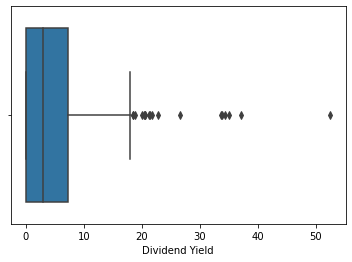

In [43]:
sns.boxplot(x=df['Dividend Yield'])

In [ ]:
# Número total de papéis


In [34]:
vm_setor = df.groupby('Setor de atuação')['Valor de mercado'].mean().sort_values(ascending=False)
vm_setor

Setor de atuação
Materiais Básicos                  2.277966e+10
Financeiro e Outros                2.220655e+10
Consumo não Cíclico                1.665977e+10
Utilidade Pública                  1.310242e+10
Comunicações                       1.251918e+10
Petróleo. Gás e Biocombustíveis    1.171842e+10
Saúde                              1.099990e+10
Bens Industriais                   5.737051e+09
Consumo Cíclico                    2.628215e+09
Tecnologia da Informação           2.578377e+09
Name: Valor de mercado, dtype: float64

<AxesSubplot:title={'center':'Média do valor de mercado das empresas por setor de atuação'}, xlabel='Setor de atuação', ylabel='Valor de mercado'>

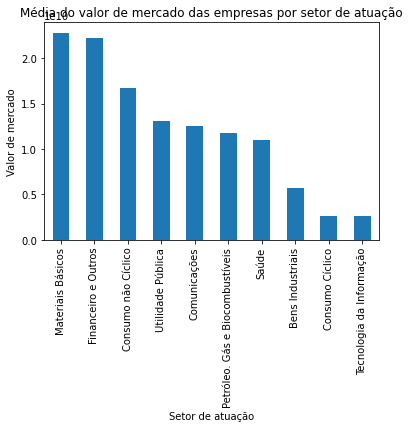

In [45]:
vm_setor.plot(kind='bar',title='Média do valor de mercado das empresas por setor de atuação', ylabel='Valor de mercado',)

<AxesSubplot:>

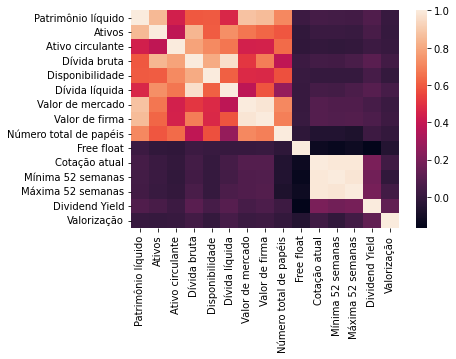

In [44]:
sns.heatmap(df.corr())

In [62]:
df[df['Valorização'] == df['Valorização'].max()]

,Papel,Empresa,CNPJ,Setor de atuação,Subsetor de atuação,Segmento de atuação,Patrimônio líquido,Ativos,Ativo circulante,Dívida bruta,...,Valor de mercado,Valor de firma,Número total de papéis,Segmento de listagem,Free float,Cotação atual,Mínima 52 semanas,Máxima 52 semanas,Dividend Yield,Valorização
117,ceeb5,CIA ELETRICIDADE EST. DA BAHIA - COELBA,15.139.629/0001-94,Utilidade Pública,Energia Elétrica,Energia Elétrica,6250000000,25859000000,6194000000,1.264500e+10,...,1.264972e+10,2.429772e+10,262096087,-,1.06,30.99,0.32,46.16,20.4,9584.38
